# Kaggle competition

## ideas:
- feed it all sraight to a DNN
- instead of categorical description of the county, add a column of GNI or GDP
- analyze the sticker popularity by its type (+ region) and maybe combine it to another column
- analyze if there is some periodic behaviour that is noy yearly or mounthly - maybe a period time of trends
- use semi-supervised learning methods on the nan targets: pseudo labeling

## save initialization time

In [69]:
config = dict()
config['Downloaded'] = True
config['pips'] = True

## pips

In [ ]:
if not(config['pips']):
    %pip install kaggle
    %pip install pandas
    %pip install scikit-learn
    %pip install torch
    %pip install matplotlib
    %pip install seaborn
else:
    print('already installed libs')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [72]:
# BOOKMARK:imports
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

## organize data in the desired folder

establish connection

In [2]:
import kaggle 
kaggle.api.authenticate()

download dataset

In [5]:

import os

if not(config['Downloaded']):

    # Set the Kaggle competition name
    competition_name = "playground-series-s5e1"  # Replace with your competition's name

    # Ensure the Kaggle API is configured
    os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser("~/.kaggle")  # Adjust if necessary

    # Create a directory to store the dataset
    download_dir = "./datasets"
    os.makedirs(download_dir, exist_ok=True)

    # Download the competition dataset
    os.system(f"kaggle competitions download -c {competition_name} -p {download_dir}")

    print(f"Dataset downloaded to {download_dir}")

else:
    print(f"Dataset already downloaded")

Dataset downloaded to ./datasets


unzip it

In [6]:
import zipfile

# Path to the downloaded ZIP file
zip_path = f"{download_dir}/{competition_name}.zip"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(download_dir)

print(f"Dataset extracted to {download_dir}")

Dataset extracted to ./datasets


## read data and preprocess

read it to a dataframe

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
csv_file_path = r"datasets\train.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(df.head())

   id        date country              store             product  num_sold
0   0  2010-01-01  Canada  Discount Stickers   Holographic Goose       NaN
1   1  2010-01-01  Canada  Discount Stickers              Kaggle     973.0
2   2  2010-01-01  Canada  Discount Stickers        Kaggle Tiers     906.0
3   3  2010-01-01  Canada  Discount Stickers            Kerneler     423.0
4   4  2010-01-01  Canada  Discount Stickers  Kerneler Dark Mode     491.0


In [9]:
df.isna().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [18]:
df = df.dropna()

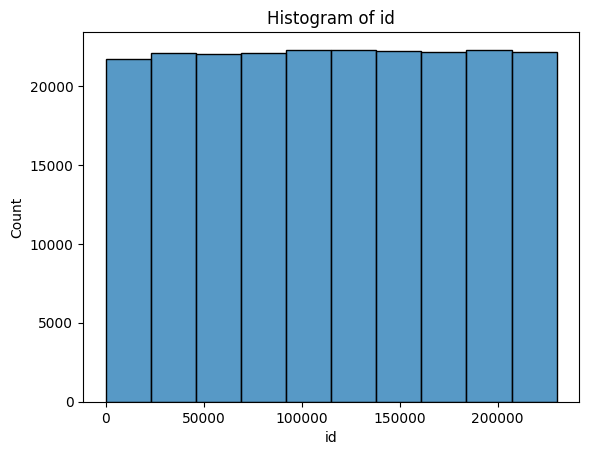

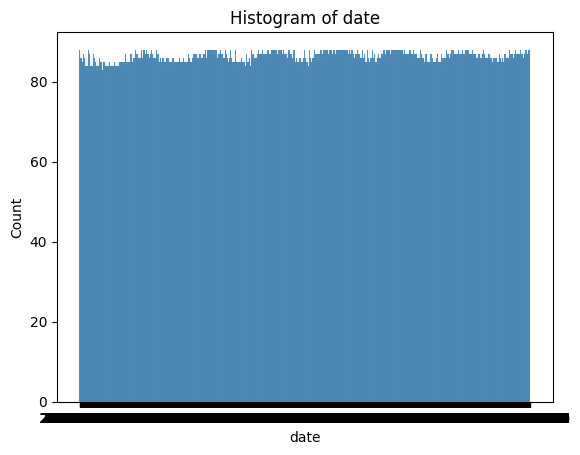

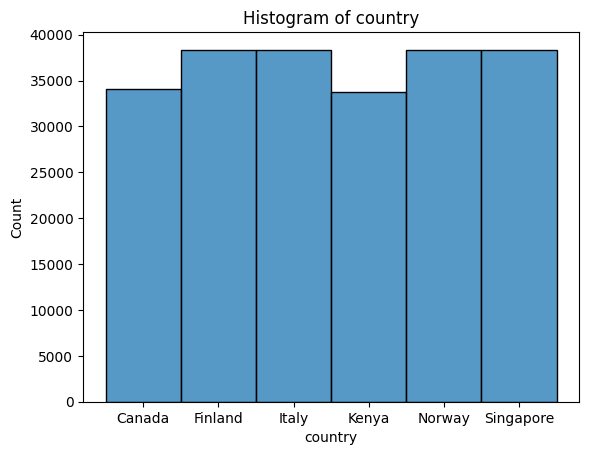

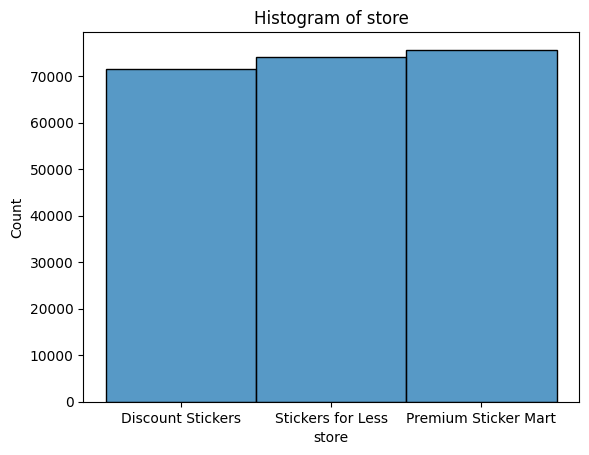

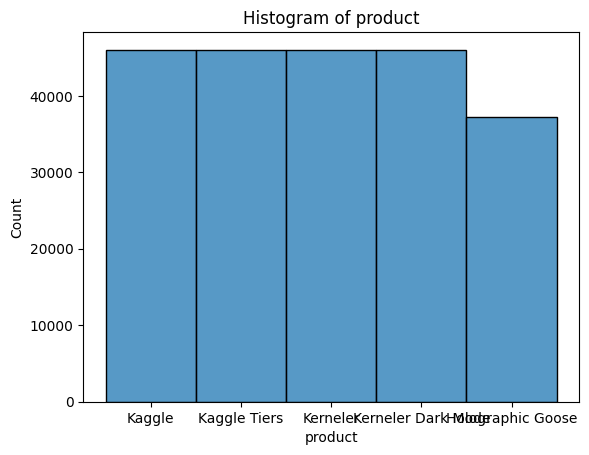

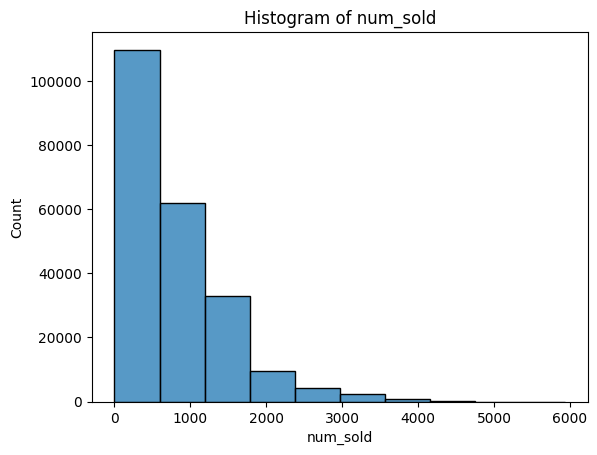

In [ ]:

# Plot histogram for each numerical column
for col in df.columns:
    sns.histplot(df[col], bins=10)
    plt.title(f"Histogram of {col}")
    plt.show()

In [20]:
df.describe()

,id,num_sold
count,221259.000000,221259.000000
mean,115398.848472,752.527382
std,66315.365084,690.165445
min,1.000000,5.000000
25%,58160.500000,219.000000
50%,115552.000000,605.000000
75%,172688.500000,1114.000000
max,230129.000000,5939.000000


In [21]:
df["country"].value_counts()

country
Finland      38355
Italy        38355
Singapore    38355
Norway       38355
Canada       34109
Kenya        33730
Name: count, dtype: int64

In [61]:
df_no_dummies = df.copy()
df = pd.get_dummies(df, columns=["country", "store", "product"], dtype=int)
dummy_names = df.columns.difference(df_no_dummies.columns).tolist()
df.head()

,id,date,num_sold,year,month,day,daycount,country_Canada,country_Finland,country_Italy,...,country_Norway,country_Singapore,store_Discount Stickers,store_Premium Sticker Mart,store_Stickers for Less,product_Holographic Goose,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
1,1,2010-01-01,973.0,2010,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,2,2010-01-01,906.0,2010,1,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,3,2010-01-01,423.0,2010,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,4,2010-01-01,491.0,2010,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
5,5,2010-01-01,300.0,2010,1,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


In [47]:
type(df["date"].iloc[0])
[a,b,c] = [int(x) for x in df["date"].iloc[0].split('-')]
print(a)
print(b)
print(c)
import datetime
daycount = datetime.date(2025,1,1) - datetime.date(2024,12,30)
print(daycount.days)

2010
1
1
2


In [52]:
import datetime
def extract_time(date_str, reference_date):
    [year,month,day] = [int(x) for x in date_str.split('-')]
    [year_ref,month_ref,day_ref] = [int(x) for x in reference_date.split('-')]
    daycount = datetime.date(year,month,day) - datetime.date(year_ref,month_ref,day_ref)
    return [year,month,day,daycount.days]

In [53]:
df[["year", "month", "day", "daycount"]] = df["date"].apply(lambda x: extract_time(x,df["date"].iloc[0])).apply(pd.Series)
df.head()

,id,date,country,store,product,num_sold,year,month,day,daycount
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1,0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1,0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,1,0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1,0
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,2010,1,1,0


In [71]:
df['log_num_sold'] = np.log10(df['num_sold'])
df.head()

,id,date,num_sold,year,month,day,daycount,country_Canada,country_Finland,country_Italy,...,country_Singapore,store_Discount Stickers,store_Premium Sticker Mart,store_Stickers for Less,product_Holographic Goose,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode,log_num_sold
1,1,2010-01-01,973.0,2010,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,2.988113
2,2,2010-01-01,906.0,2010,1,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,2.957128
3,3,2010-01-01,423.0,2010,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,2.626340
4,4,2010-01-01,491.0,2010,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,2.691081
5,5,2010-01-01,300.0,2010,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,2.477121


In [ ]:
# set seed
torch.manual_seed(442)

In [ ]:
from torch import tensor

t_dep = tensor(df['num_sold'])

indep_cols = ['year', 'month', 'day', 'daycount'] + dummy_names

t_indep = tensor(df[indep_cols].values, dtype=torch.float)

In [ ]:
# BOOKMARK:END